<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_15_Notebook_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Sumarização de Textos**
---



A **Sumarização de Textos** é o processo de gerar um resumo conciso e coerente de um texto mais longo. O objetivo é capturar as informações mais importantes e relevantes, reduzindo o tamanho do texto original sem perder seu significado essencial.

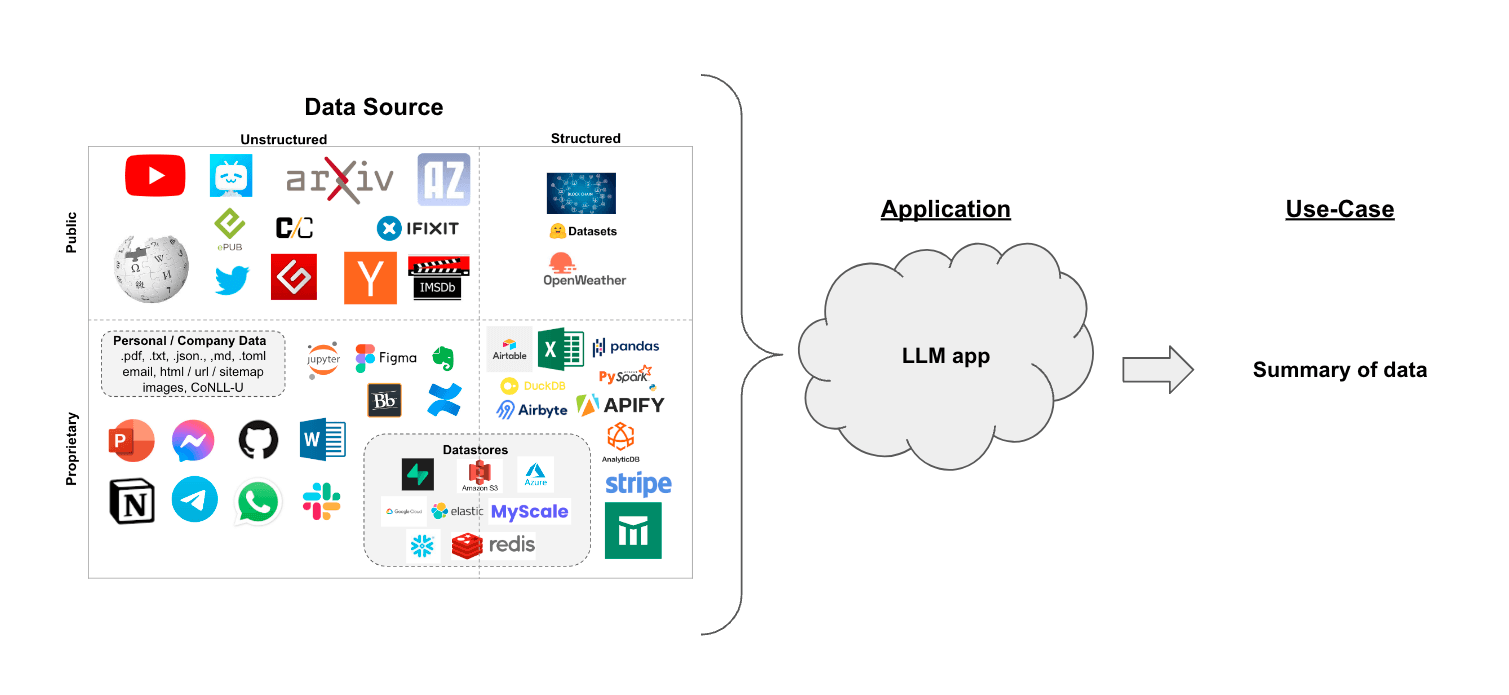

Existem duas abordagens principais para a sumarização de textos:

1. **Sumarização Extrativa**: essa abordagem seleciona e extrai partes do texto original, como frases ou parágrafos, que são consideradas mais importantes. O resumo é formado pela combinação dessas partes extraídas. Métodos comuns incluem, por exemplo, a frequência de palavras.

2. **Sumarização Abstrativa**: em vez de simplesmente extrair partes do texto, essa abordagem cria uma nova versão do texto que transmite as ideias principais de forma mais concisa. Isso envolve a geração de frases novas e pode utilizar técnicas avançadas de aprendizado de máquina, como modelos de linguagem treinados, para gerar um resumo que seja mais fluente e coeso.

#### **LangChain**

In [ ]:
#@title Instalando o pacote LangChain
!pip install -qU langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 557.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
@title Versão do LangChain

import langchain

print(langchain.__version__)

0.2.13


In [ ]:
#@title Integração com o pacote da OpenAI

!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 950.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00


Muitas das aplicações que você constrói com **LangChain** conterão múltiplas etapas com várias invocações de chamadas de LLM. À medida que essas aplicações se tornam mais complexas, torna-se importante ser capaz de inspecionar o que exatamente está acontecendo dentro de sua cadeia ou agente. A melhor maneira de fazer isso é com o **LangSmith**.

**LangSmith** é uma ferramenta desenvolvida para monitorar, depurar e otimizar fluxos de trabalho em **LangChain**.

In [ ]:
#@title Definindo a chave do LangChain [LangSmith]

import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

··········


In [ ]:
#@title Definindo a chave da API da OpenAI

import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


#### **Exemplos**

Uma questão central ao construir um sumarizador é como passar seus documentos para a janela de contexto do LLM

>
Três maneiras de resumir ou combinar documentos de outra forma:

1. **Stuff**: concatene todos os documentos em um único *prompt*.
2. **Map-Reduce**: resuma cada documento individualmente em uma etapa de `map` e depois `reduza` os resumos em um resumo final.
3. **Refine**: que atualiza um resumo contínuo iterando sobre os documentos em uma sequência.

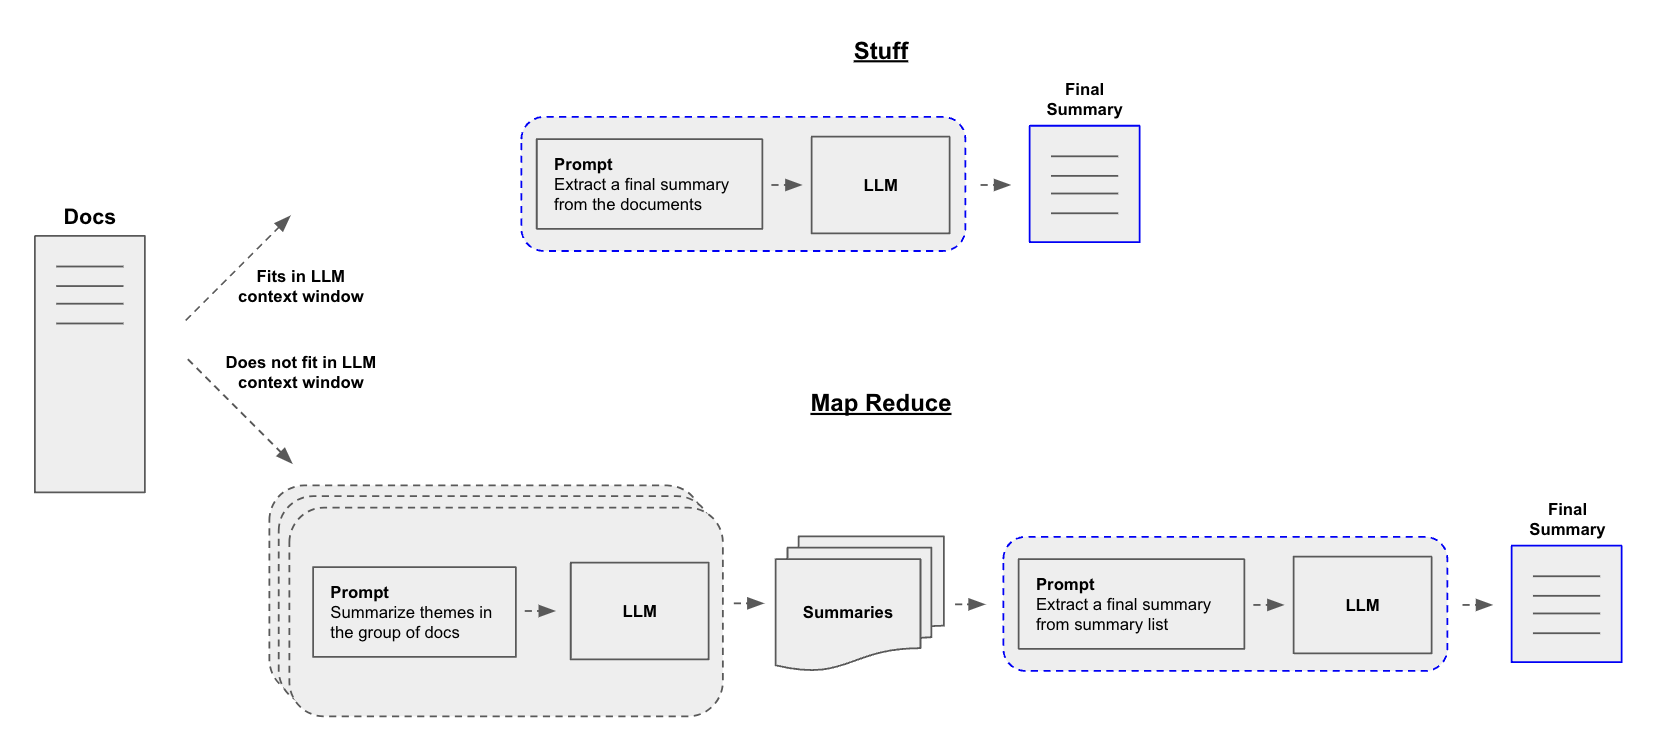

In [ ]:
!pip install -qU langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.1 MB/s eta 0:00:00


Primeiro, carregamos nossos documentos. Vamos usar o `WebBaseLoader` para carregar uma postagem de blog:

In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain_community.document_loaders import WebBaseLoader
from langchain_openai import ChatOpenAI

loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
docs = loader.load()

modelo = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# chain_type="map_reduce" ou chain_type="refine"
chain = load_summarize_chain(modelo, chain_type="stuff")

resposta = chain.invoke(docs)

In [ ]:
print(resposta["output_text"])

The article "LLM Powered Autonomous Agents" by Lilian Weng explores the development and capabilities of autonomous agents powered by large language models (LLMs). It outlines a system architecture comprising three main components: 

1. **Planning**: Agents decompose complex tasks into manageable subgoals and engage in self-reflection to improve future actions.
2. **Memory**: The system utilizes short-term and long-term memory, with techniques like Maximum Inner Product Search (MIPS) for efficient information retrieval.
3. **Tool Use**: Agents can leverage external APIs and tools to enhance their functionality, demonstrated through various case studies, including scientific discovery and generative simulations.

The article also discusses challenges such as finite context length, difficulties in long-term planning, and the reliability of natural language interfaces. It highlights several proof-of-concept projects like AutoGPT and GPT-Engineer, showcasing the potential and limitations of

In [ ]:
from IPython.display import Markdown

Markdown(resposta["output_text"])

The article "LLM Powered Autonomous Agents" by Lilian Weng explores the development and capabilities of autonomous agents powered by large language models (LLMs). It outlines a system architecture comprising three main components: 

1. **Planning**: Agents decompose complex tasks into manageable subgoals and engage in self-reflection to improve future actions.
2. **Memory**: The system utilizes short-term and long-term memory, with techniques like Maximum Inner Product Search (MIPS) for efficient information retrieval.
3. **Tool Use**: Agents can leverage external APIs and tools to enhance their functionality, demonstrated through various case studies, including scientific discovery and generative simulations.

The article also discusses challenges such as finite context length, difficulties in long-term planning, and the reliability of natural language interfaces. It highlights several proof-of-concept projects like AutoGPT and GPT-Engineer, showcasing the potential and limitations of LLM-powered agents in real-world applications.

**Opção 1. `Stuff`**
>

A cadeia irá pegar uma lista de documentos, inseri-los todos em um *prompt* e passar esse *prompt* para um LLM:

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain.chains.combine_documents import create_stuff_documents_chain

loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
docs = loader.load()

prompt_template = "Summarize this content: {context}"

prompt = ChatPromptTemplate.from_template(prompt_template)

modelo = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

chain = create_stuff_documents_chain(modelo, prompt)

resposta = chain.invoke({"context": docs})

In [ ]:
from IPython.display import Markdown

Markdown(resposta)

The article "LLM Powered Autonomous Agents" by Lilian Weng discusses the development and capabilities of autonomous agents powered by large language models (LLMs). It outlines a framework for these agents, which includes three main components: planning, memory, and tool use.

1. **Agent System Overview**: LLMs serve as the core controller for autonomous agents, enabling them to perform complex tasks through planning, memory management, and tool utilization.

2. **Planning**: This involves task decomposition, where agents break down large tasks into smaller subgoals, and self-reflection, allowing them to learn from past actions and improve future performance. Techniques like Chain of Thought (CoT) and Tree of Thoughts enhance reasoning and planning capabilities.

3. **Memory**: The article distinguishes between short-term and long-term memory, with short-term memory being akin to in-context learning and long-term memory involving external vector stores for information retrieval. Maximum Inner Product Search (MIPS) algorithms are discussed for efficient memory retrieval.

4. **Tool Use**: The ability to utilize external tools significantly enhances the capabilities of LLMs. Examples include MRKL systems, which combine LLMs with expert modules, and frameworks like HuggingGPT that facilitate task planning and execution through model selection and API calls.

5. **Case Studies**: The article presents examples of LLM-powered agents in scientific discovery and generative simulations, showcasing their potential in complex problem-solving and interactive environments.

6. **Challenges**: Key limitations include finite context length, difficulties in long-term planning, and the reliability of natural language interfaces, which can lead to errors in communication and execution.

Overall, the article emphasizes the innovative potential of LLMs in creating autonomous agents capable of sophisticated reasoning, memory management, and tool utilization, while also acknowledging the challenges that remain in their development.

**Opção 2. `Map-Reduce`**

Vamos explorar a abordagem `map-reduce`. Para isso, primeiro mapearemos cada documento para um resumo individual usando um `LLMChain`. Em seguida, usaremos um `ReduceDocumentsChain` para combinar esses resumos em um único resumo global.

Primeiro, especificamos o `LLMChain` a ser usado para mapear cada documento para um resumo individual:

In [ ]:
from langchain.chains import MapReduceDocumentsChain, ReduceDocumentsChain
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains.llm import LLMChain
from langchain.chains.combine_documents.stuff import StuffDocumentsChain

modelo = ChatOpenAI(temperature=0, model="gpt-4o-mini")

# Map
map_template = """The following is a set of documents
{docs}
Based on this list of docs, please identify the main themes
Helpful Answer:"""

map_prompt = PromptTemplate.from_template(map_template)
map_chain = LLMChain(llm=modelo, prompt=map_prompt)

Também podemos usar o `Prompt Hub` para armazenar e buscar *prompts*.

>
Isso funcionará com sua [chave de API do LangSmith](https://docs.smith.langchain.com/).

>

Por exemplo, veja o prompt de mapeamento [aqui](https://smith.langchain.com/hub/rlm/map-prompt).

In [ ]:
!pip install -qU langchainhub

In [ ]:
from langchain import hub

map_prompt = hub.pull("rlm/map-prompt")
map_chain = LLMChain(llm=modelo, prompt=map_prompt)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


O `ReduceDocumentsChain` lida com a tarefa de pegar os resultados do mapeamento de documentos e reduzi-los em uma única saída. Ele encapsula uma `CombineDocumentsChain` genérica (como `StuffDocumentsChain`), mas adiciona a capacidade de colapsar documentos antes de passá-los para a `CombineDocumentsChain` se o tamanho cumulativo exceder `token_max`. Neste exemplo, podemos reutilizar nossa cadeia para combinar nossos documentos e também colapsá-los.
>
Então, se o número cumulativo de tokens em nossos documentos mapeados exceder 4000 tokens, passaremos os documentos recursivamente em lotes de menos de 4000 tokens para o `StuffDocumentsChain` para criar resumos em lotes. E, uma vez que esses resumos em lotes tenham cumulativamente menos de 4000 tokens, passaremos todos eles uma última vez para o `StuffDocumentsChain` para criar o resumo final.

In [ ]:
# Reduce
reduce_template = """The following is set of summaries:
{docs}
Take these and distill it into a final, consolidated summary of the main themes.
Helpful Answer:"""
reduce_prompt = PromptTemplate.from_template(reduce_template)

In [ ]:
reduce_prompt = hub.pull("rlm/reduce-prompt")

In [ ]:
reduce_prompt

ChatPromptTemplate(input_variables=['doc_summaries'], metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'reduce-prompt', 'lc_hub_commit_hash': 'a3d558b35e478278c448c2988cd2ed1422cede59d59c63cf203b733d4ddf73f0'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['doc_summaries'], template='The following is set of summaries:\n{doc_summaries}\nTake these and distill it into a final, consolidated summary of the main themes. \nHelpful Answer:'))])

In [ ]:
# Run chain
reduce_chain = LLMChain(llm=modelo, prompt=reduce_prompt)

# Takes a list of documents, combines them into a single string, and passes this to an LLMChain
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain, document_variable_name="doc_summaries"
)

# Combines and iteratively reduces the mapped documents
reduce_documents_chain = ReduceDocumentsChain(
    # This is final chain that is called.
    combine_documents_chain = combine_documents_chain,
    # If documents exceed context for `StuffDocumentsChain`
    collapse_documents_chain = combine_documents_chain,
    # The maximum number of tokens to group documents into.
    token_max=4000,
)

Combinando nossas cadeias de `map` e `reduce` em uma só:

In [ ]:
# Combining documents by mapping a chain over them, then combining results
map_reduce_chain = MapReduceDocumentsChain(
    # Map chain
    llm_chain=map_chain,
    # Reduce chain
    reduce_documents_chain=reduce_documents_chain,
    # The variable name in the llm_chain to put the documents in
    document_variable_name="docs",
    # Return the results of the map steps in the output
    return_intermediate_steps=False,
)

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(docs)

In [ ]:
resposta = map_reduce_chain.invoke(split_docs)

In [ ]:
from IPython.display import Markdown

Markdown(resposta["output_text"])

Here’s a distilled summary of the main themes related to LLM-powered autonomous agents and software development best practices:

1. **Architecture and Design**: Emphasizes the importance of a well-defined system architecture for LLM-powered agents, including modular design, separation of concerns, and adherence to best practices for maintainability and readability.

2. **Task Planning and Reasoning**: Highlights methodologies like Chain of Thought (CoT) and Tree of Thoughts for breaking down complex tasks, enhancing reasoning and decision-making capabilities in autonomous agents.

3. **Memory and Learning**: Discusses the role of short-term and long-term memory in agents, focusing on in-context learning and the retention of information to inform behavior and improve decision-making through self-reflection and iterative feedback.

4. **Tool Integration**: Stresses the significance of integrating external tools and APIs to augment LLM capabilities, enabling agents to perform complex tasks and access additional information.

5. **Performance Evaluation**: Underlines the necessity of evaluating LLM performance through self-assessment and expert feedback, particularly in specialized applications where accuracy is critical.

6. **Documentation and Collaboration**: Highlights the need for clear documentation and comments in code to facilitate collaboration and maintainability among developers.

7. **Testing and Quality Assurance**: Emphasizes the importance of rigorous testing, using frameworks like `pytest`, to ensure the reliability and correctness of code implementations.

8. **Ethical Considerations**: Addresses the ethical implications of AI applications, particularly in sensitive domains, and the potential risks associated with autonomous decision-making.

9. **Emergent Capabilities and Prompt Engineering**: Investigates the emergent behaviors of LLMs and the significance of prompt design in eliciting desired responses, reflecting ongoing research into maximizing model effectiveness.

10. **Human Interaction and Feedback**: Points to the importance of human feedback in refining LLMs, emphasizing interactive learning to enhance model performance.

This summary encapsulates the key themes related to the architecture, functionality, challenges, and applications of LLM-powered autonomous agents, alongside best practices in software development.

**Opção 3. `Refine`**
>

`RefineDocumentsChain` é semelhante ao `map-reduce`:
>

- A cadeia de refinamento de documentos constrói uma resposta percorrendo os documentos de entrada e atualizando iterativamente sua resposta. Para cada documento, ela passa todos os insumos não relacionados ao documento, o documento atual e a resposta intermediária mais recente para uma cadeia LLM, a fim de obter uma nova resposta.

Isso pode ser facilmente executado com `chain_type="refine"` especificado.

In [ ]:
chain = load_summarize_chain(modelo, chain_type="refine")

resposta = chain.invoke(split_docs)

In [ ]:
from IPython.display import Markdown

Markdown(resposta["output_text"])

The article "LLM Powered Autonomous Agents" by Lilian Weng explores the integration of large language models (LLMs) in the development of autonomous agents. It presents a framework where LLMs act as the central controller, supported by three key components: Planning, Memory, and Tool Use.

Autonomous agents are designed to decompose complex tasks into manageable subgoals and engage in self-reflection to enhance their future performance. Techniques such as Chain of Thought (CoT) and Tree of Thoughts are employed to improve reasoning capabilities. Memory is divided into short-term and long-term categories, with external storage mechanisms that facilitate efficient retrieval through various algorithms.

The Tool Use component enables agents to access external APIs, thereby extending their functionality and allowing them to handle intricate tasks. The article provides proof-of-concept examples, including AutoGPT and BabyAGI, which underscore the significance of self-reflection and iterative improvement in agent performance.

Advanced methodologies like Chain of Hindsight (CoH) and Algorithm Distillation (AD) are introduced, illustrating the potential for LLMs to learn and adapt through experience. The neuro-symbolic architecture MRKL is discussed, along with frameworks such as TALM and Toolformer, which further enhance the capabilities of LLMs.

The article also addresses challenges faced in real-world applications, including inference efficiency and stability, and introduces API-Bank as a tool for evaluating LLMs augmented with external tools. Case studies, such as ChemCrow, demonstrate the application of LLM-powered agents in scientific discovery, while the risks associated with LLMs, particularly in illicit contexts, are critically examined.

Additionally, the concept of Generative Agents is introduced, showcasing emergent social behaviors in controlled environments. The article concludes by emphasizing the transformative potential of LLMs in empowering autonomous agents to perform complex tasks effectively, while also addressing ongoing challenges such as limited context capacity, difficulties in long-term planning and task decomposition, and the reliability of natural language interfaces. These challenges highlight the need for further innovations in the field to enhance the practical implementation of LLM-centered agents.

Citation: Weng, Lilian. (Jun 2023). “LLM-powered Autonomous Agents”. Lil’Log. https://lilianweng.github.io/posts/2023-06-23-agent/.

Também é possível fornecer um *prompt* e retornar etapas intermediárias.

In [ ]:
prompt_template = """Write a concise summary of the following:
{text}
CONCISE SUMMARY:"""
prompt = PromptTemplate.from_template(prompt_template)

refine_template = (
    "Your job is to produce a final summary\n"
    "We have provided an existing summary up to a certain point: {existing_answer}\n"
    "We have the opportunity to refine the existing summary"
    "(only if needed) with some more context below.\n"
    "------------\n"
    "{text}\n"
    "------------\n"
    "Given the new context, refine the original summary in Portuguese"
    "If the context isn't useful, return the original summary."
)

refine_prompt = PromptTemplate.from_template(refine_template)

chain = load_summarize_chain(
    llm = modelo,
    chain_type="refine",
    question_prompt = prompt,
    refine_prompt = refine_prompt,
    return_intermediate_steps = True,
    input_key = "input_documents",
    output_key = "output_text",
)


In [ ]:
resposta = chain.invoke({"input_documents": split_docs}, return_only_outputs=True)

In [ ]:
from IPython.display import Markdown

Markdown(resposta["output_text"])

O artigo "LLM Powered Autonomous Agents" de Lilian Weng discute a integração de grandes modelos de linguagem (LLMs) na criação de agentes autônomos. Ele descreve um sistema onde os LLMs atuam como o controlador central, apoiado por três componentes principais:

1. **Planejamento**: Os agentes decompõem tarefas complexas em subobjetivos menores e se envolvem em autorreflexão para melhorar o desempenho futuro. Técnicas como Chain of Thought (CoT) e Tree of Thoughts são utilizadas para facilitar a decomposição de tarefas, permitindo que o modelo pense passo a passo e explore múltiplas possibilidades de raciocínio. O LLM+P combina LLMs com planejadores clássicos para planejamento de longo prazo, utilizando a Linguagem de Definição de Domínio de Planejamento (PDDL). No entanto, o artigo destaca que o planejamento a longo prazo e a decomposição de tarefas ainda apresentam desafios, pois os LLMs têm dificuldade em ajustar planos diante de erros inesperados, tornando-os menos robustos em comparação com humanos que aprendem com tentativas e erros.

2. **Memória**: Os agentes utilizam memória de curto prazo para aprendizado em contexto e memória de longo prazo para reter informações extensas por meio de armazenamento externo. A autorreflexão é um aspecto vital que permite que os agentes autônomos melhorem iterativamente, refinando decisões passadas e corrigindo erros anteriores. O conceito de Chain of Hindsight (CoH) é introduzido, onde o modelo é treinado para melhorar suas saídas com base em feedback humano, utilizando uma sequência de saídas passadas anotadas com comentários. A memória é categorizada em três tipos: memória sensorial, memória de curto prazo (ou memória de trabalho) e memória de longo prazo. O uso de armazenamento externo e técnicas como Maximum Inner Product Search (MIPS) permite que os agentes acessem rapidamente informações relevantes, superando as limitações da memória de curto prazo. O artigo também menciona algoritmos de MIPS, como LSH, ANNOY, HNSW, FAISS e ScaNN, que são utilizados para otimizar a busca e recuperação de informações.

3. **Uso de Ferramentas**: Os agentes podem acessar APIs externas para coletar informações adicionais e realizar tarefas além de suas capacidades pré-treinadas. Abordagens como ReAct e Reflexion são mencionadas, onde a primeira integra raciocínio e ação, enquanto a segunda fornece memória dinâmica e capacidades de autorreflexão para melhorar as habilidades de raciocínio. O artigo também menciona o conceito de Algorithm Distillation (AD), que aplica a ideia de aprendizado a partir de históricos de interações em tarefas de aprendizado por reforço, permitindo que o agente aprenda a partir de experiências passadas e melhore seu desempenho em futuras interações. O uso de ferramentas externas é destacado como uma característica distintiva que amplia significativamente as capacidades dos LLMs, permitindo que eles realizem tarefas que vão além de suas limitações cognitivas e físicas.

Além disso, o artigo menciona sistemas como MRKL, que utiliza uma arquitetura neuro-simbólica para agentes autônomos, onde um LLM atua como um roteador para módulos especializados. Experimentos mostraram que a capacidade de um LLM de usar ferramentas externas, como calculadoras, é crucial para resolver problemas, destacando a importância de saber quando e como utilizar essas ferramentas. Outras abordagens, como TALM e Toolformer, também são discutidas, mostrando como os LLMs podem ser aprimorados para aprender a usar APIs externas. Exemplos práticos, como plugins do ChatGPT e a API da OpenAI, demonstram a aplicação dessas capacidades.

O HuggingGPT é apresentado como um framework que utiliza o ChatGPT para planejamento de tarefas, selecionando modelos disponíveis na plataforma HuggingFace. O artigo destaca o potencial dos LLMs como solucionadores gerais de problemas, referenciando vários projetos de prova de conceito, como AutoGPT e BabyAGI, ao mesmo tempo em que aborda os desafios envolvidos no desenvolvimento de tais sistemas. Além disso, menciona a necessidade de melhorias na eficiência, estabilidade e na capacidade de comunicação em contextos complexos.

O benchmark API-Bank é introduzido como uma ferramenta para avaliar o desempenho de LLMs aumentados por ferramentas, envolvendo uma variedade de APIs e a capacidade de planejar chamadas de API em cenários complexos. Exemplos de estudos de caso, como o ChemCrow, mostram a aplicação de LLMs em descobertas científicas, destacando a importância de ferramentas especializadas e a avaliação de desempenho por especialistas. O artigo também explora tendências atuais na descoberta de medicamentos anticâncer, onde os agentes selecionam alvos e tentam sintetizar compostos, discutindo os riscos associados, como drogas ilícitas e armas biológicas. Um conjunto de testes foi desenvolvido para avaliar a capacidade dos agentes em sintetizar agentes químicos conhecidos, com uma taxa de aceitação de 36% para soluções de síntese.

Além disso, a simulação de Agentes Generativos, onde 25 personagens virtuais interagem em um ambiente inspirado em The Sims, é apresentada como um experimento que combina LLMs com memória, planejamento e mecanismos de reflexão, resultando em comportamentos sociais emergentes e interações dinâmicas entre os agentes. O artigo, portanto, não apenas apresenta as capacidades e inovações trazidas pelos LLMs, mas também discute as implicações éticas e práticas de sua aplicação em contextos complexos e sensíveis.

O artigo também menciona limitações comuns observadas na construção de agentes centrados em LLMs, como a capacidade de contexto finito, que limita a inclusão de informações históricas e instruções detalhadas, e a confiabilidade da interface de linguagem natural, que pode levar a erros de formatação e comportamentos indesejados. Essas limitações sugerem a necessidade de abordagens mais robustas para superar os desafios no desenvolvimento de agentes autônomos.

In [ ]:
print("\n\n".join(resposta["intermediate_steps"][:3]))

The article "LLM Powered Autonomous Agents" by Lilian Weng discusses the integration of large language models (LLMs) in creating autonomous agents. It outlines a system where LLMs serve as the core controller, supported by three main components: 

1. **Planning**: Agents decompose complex tasks into smaller subgoals and engage in self-reflection to improve future performance.
2. **Memory**: Agents utilize both short-term memory for in-context learning and long-term memory for retaining extensive information through external storage.
3. **Tool Use**: Agents can access external APIs to gather additional information and perform tasks beyond their pre-trained capabilities.

The article highlights the potential of LLMs as general problem solvers, referencing various proof-of-concept projects like AutoGPT and BabyAGI, while also addressing the challenges involved in developing such systems.

O artigo "LLM Powered Autonomous Agents" de Lilian Weng discute a integração de grandes modelos de li

## **Referências**

> https://python.langchain.com/v0.2/docs/tutorials/summarization/

